In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('../code/')
from diusst_model import diusst_bayesian as diusst
from interpolation import *
from diusst_funcs import *

In [5]:
data_interval = [1149,1471]
data_orig = pd.read_csv('../data/bayesian_training/training_minnett_ssterr03-10_humid10.csv')[data_interval[0]:data_interval[1]]

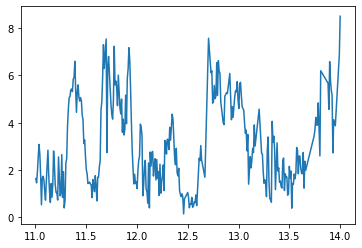

In [8]:
plt.plot(data_orig['times']/86400,data_orig['wind'])

In [9]:
data_int = interpolate(data_orig,1)

In [42]:
data_cfl, dt_list = cfl_interpolation(data_orig,dz0=0.15,ngrid=30, k_eddy_max=3e-4)

+++ Variable time-step interpolation +++
Interpolated dataset has 26507 time steps with average length 9.915 s.
Constant dt interpolation would require dt = 6.294 s --> 45572 steps.
Computation time will be reduced by 41.835 %
++++++++++++++++++++++++++++++++++++++++


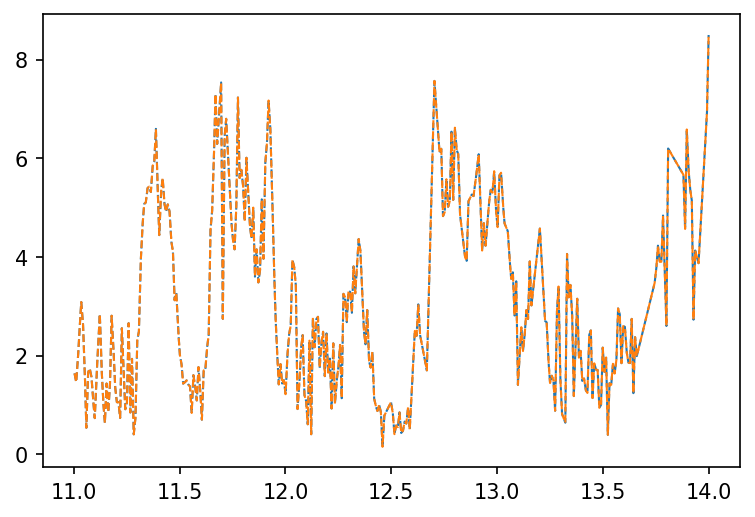

In [15]:
fig, ax = plt.subplots(dpi=150)
ax.plot(data_cfl['times']/86400,data_cfl['wind'],'--',lw=1)
ax.plot(data_int['times']/86400,data_int['wind'],'--',lw=1)

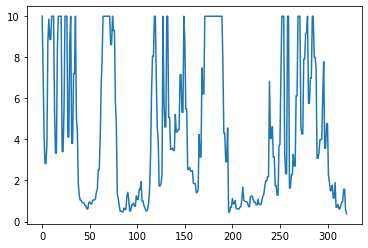

In [16]:
plt.plot(dt_list)

In [43]:
kappa = 30e-5
mu = 1e-4
attenu = 2

dz0 = 0.15
ngrid = 30
diffu = 1
opac = 1
k_mol = 1e-7
maxwind = 10

In [56]:
ftemp = np.mean(data_int['ftemp'].to_numpy(np.float64))
sst_data = data_int['sst'].to_numpy(np.float64) - data_int['ftemp'].to_numpy(np.float64)
sst_err = data_int['sst_err'].to_numpy(np.float64)
times = data_int['times'].to_numpy(np.float64)
wind = data_int['wind'].to_numpy(np.float64)
atemp = data_int['atemp'].to_numpy(np.float64)
swrad = data_int['swrad'].to_numpy(np.float64)
humid = data_int['humid'].to_numpy(np.float64)

simu1 = diusst(
            times, atemp, swrad, u_data=wind, sa_data=humid, T_f=ftemp,
            k_eddy=kappa, mu=mu, attenu=attenu,
            opac=opac, k_mol=k_mol,
            dz=dz0, ngrid=10)

In [57]:
#ftemp = np.mean(data_cfl['ftemp'].to_numpy(np.float64))
#sst_data = data_cfl['sst'].to_numpy(np.float64) - data_cfl['ftemp'].to_numpy(np.float64)
#sst_err = data_cfl['sst_err'].to_numpy(np.float64)
#times = data_cfl['times'].to_numpy(np.float64)
#wind = data_cfl['wind'].to_numpy(np.float64)
#atemp = data_cfl['atemp'].to_numpy(np.float64)
#swrad = data_cfl['swrad'].to_numpy(np.float64)
#humid = data_cfl['humid'].to_numpy(np.float64)

simu2 = diusst(
            times, atemp, swrad, u_data=wind, sa_data=humid, T_f=ftemp,
            k_eddy=kappa, mu=mu, attenu=attenu,
            opac=opac, k_mol=k_mol,
            dz=dz0, ngrid=ngrid)

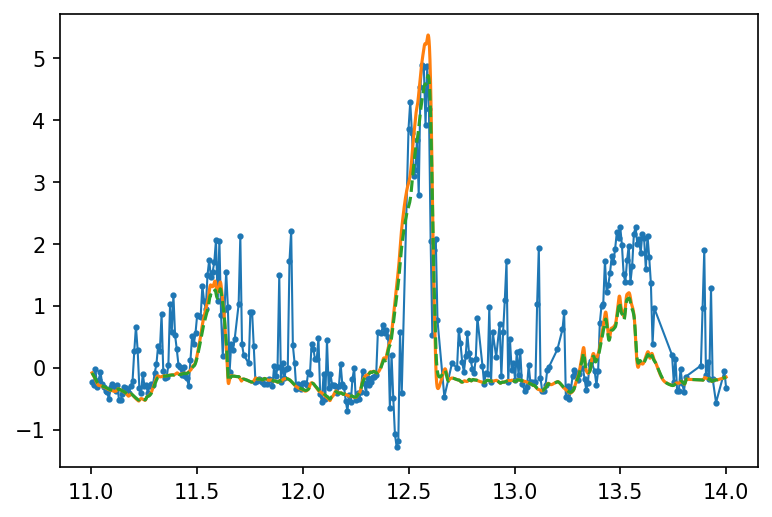

In [58]:
ftemp = np.mean(data_orig['ftemp'].to_numpy(np.float64))
sst_data = data_orig['sst'].to_numpy(np.float64) - data_orig['ftemp'].to_numpy(np.float64)
sst_err = data_orig['sst_err'].to_numpy(np.float64)
times = data_orig['times'].to_numpy(np.float64)
wind = data_orig['wind'].to_numpy(np.float64)
atemp = data_orig['atemp'].to_numpy(np.float64)
swrad = data_orig['swrad'].to_numpy(np.float64)
humid = data_orig['humid'].to_numpy(np.float64)

fig, ax = plt.subplots(dpi=150)
ax.plot(times/86400,sst_data,'-o',markersize=2,lw=1)
ax.plot(data_int['times']/86400,simu1[0][:,0]-ftemp,label='reg_int')
ax.plot(data_int['times']/86400,simu2[0][:,0]-ftemp,'--',label='cfl_int')